# 합성 과일 탐지 모델

### 데이터셋 다운로드

* 합성 과일 데이터셋: https://public.roboflow.com/object-detection/synthetic-fruit

In [1]:
# YOLO v5 PyTorch 다운로드
!git clone https://github.com/ultralytics/yolov5
%cd /content/yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15672, done.
remote: Total 15672 (delta 0), reused 0 (delta 0), pack-reused 15672
Receiving objects: 100% (15672/15672), 14.43 MiB | 24.76 MiB/s, done.
Resolving deltas: 100% (10745/10745), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.1/585.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 17.0 MB/s eta 0:00:00


In [2]:
%cd /content
# 특정 목적에 필요한 데이터와 레이블에 대해서만 학습하도록 함
# YOLO v5 PyTorch 데이터 다운로드
!curl -L "https://public.roboflow.com/ds/blhUg3ym6z?key=OHAQN4DPft" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/labels/2126_jpg.rf.31b8e6dc4420419efd473a6107107b3d.txt  
 extracting: train/labels/953_jpg.rf.3237a6da506b0e14519398ac5154df88.txt  
 extracting: train/labels/536_jpg.rf.32447c4f1a00e8b7f5704ccb90e9bf2c.txt  
 extracting: train/labels/4110_jpg.rf.32d576a4ea056c5a68766c05ff964361.txt  
 extracting: train/labels/2343_jpg.rf.32b08b67e8824f3ac03a5e75eecc2292.txt  
 extracting: train/labels/598_jpg.rf.32811e5c5883b63779507b987339832a.txt  
 extracting: train/labels/609_jpg.rf.32803d9828f5ee48533818bdb66cffd2.txt  
 extracting: train/labels/3395_jpg.rf.328a102b4ac65a32acedaf54a547c580.txt  
 extracting: train/labels/1999_jpg.rf.323ede90269037ac11a963a28da5d7dc.txt  
 extracting: train/labels/1562_jpg.rf.325c9a2d4df6bda0b4078d9fdef469ec.txt  
 extracting: train/labels/1062_jpg.rf.33089ee136cf6d8b3e6420a44b14a441.txt  
 extracting: train/labels/3298_jpg.rf.32ab1b582dba1af367578000a8a7018e.txt  
 extracting: train/labels/399_jpg.rf.327081d

In [3]:
# train, valid 경로 정보 및 63개의 레이블 (클래스) 확인
%cat /content/data.yaml

train: ../train/images
val: ../valid/images

nc: 63
names: ['Apple', 'Apricot', 'Avocado', 'Banana', 'Beetroot', 'Blueberry', 'Cactus', 'Cantaloupe', 'Carambula', 'Cauliflower', 'Cherry', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant', 'Ginger', 'Granadilla', 'Grape', 'Grapefruit', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mangostan', 'Maracuja', 'Melon', 'Mulberry', 'Nectarine', 'Nut', 'Onion', 'Orange', 'Papaya', 'Passion', 'Peach', 'Pear', 'Pepino', 'Pepper', 'Physalis', 'Pineapple', 'Pitahaya', 'Plum', 'Pomegranate', 'Pomelo', 'Potato', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Tamarillo', 'Tangelo', 'Tomato', 'Walnut']

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

In [4]:
%cd /content/yolov5
# 학습 (epochs 50 -> 10 변경)
!python train.py --img 416 --batch 16 --epochs 10 --data /content/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name fruit_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=fruit_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

### 추론(Inference)

detect: weights=['runs/train/fruit_results/weights/best.pt'], source=/content/valid/images/542_jpg.rf.aa3fa093da9e8ee34907b3a4e87d978e.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7180036 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/valid/images/542_jpg.rf.aa3fa093da9e8ee34907b3a4e87d978e.jpg: 640x512 1 Eggplant, 41.4ms
Speed: 0.5ms pre-process, 41.4ms inference, 1.5ms NMS per image at shape (1, 3, 6

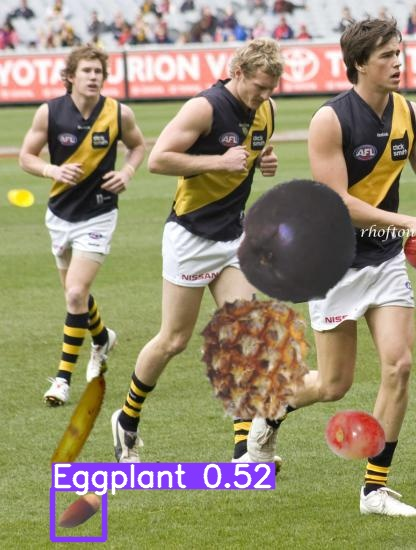

In [11]:
# 검증 데이터로 추론하기 (train, test, valid 데이터를 나누지 않았으므로 valid 사용)
from IPython.display import Image
from glob import glob
import os

img_list = glob('/content/valid/images/*.jpg')

valid_img_path = img_list[1]

!python detect.py --weights runs/train/fruit_results/weights/best.pt --conf 0.5 --source "{valid_img_path}"
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(valid_img_path)))

### 모델 내보내기

In [12]:
# 가장 수치가 좋았던 가중치 파일 구글 드라이브로 내보내기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# /content/drive/MyDrive/fruite 디렉터리 생성 및 이동
%cp /content/yolov5/runs/train/fruit_results/weights/best.pt /content/drive/My\ Drive/fruit

### 학습된 모델을 이용해서 영상에 있는 총을 인식하기

In [15]:
# 이후 저장된 모델을 사용해 인식
# 웹캠의 경우 --source 0
# !python detect.py --weights runs/train/fruit_results/weights/best.pt --source '동영상 파일 경로'